In [1]:
import pandas as pd 
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import matplotlib as mpl
mpl.rcParams['font.family'] = 'Times New Roman'

df = pd.read_csv('Data.csv')
print('Initial Data: ', df.shape)
df = df.dropna()
df = df.iloc[:, :10]
print('Data after null removal: ', df.shape)

Initial Data:  (20927, 15)
Data after null removal:  (20867, 10)


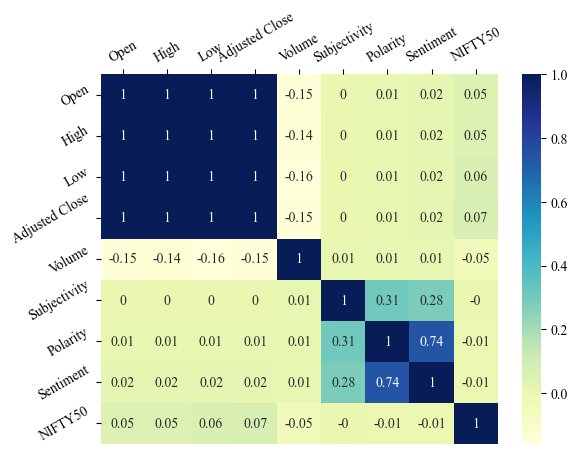

In [2]:
correlation_matrix = df[['Open', 'High', 'Low', 'Adjusted Close', 'Volume', 'Subjectivity',
       'Polarity', 'Sentiment', 'NIFTY50']].corr(method = 'pearson').round(2) # ‘kendall’ ‘spearman’
fig, ax = plt.subplots()
ax = sns.heatmap(correlation_matrix, annot=True, fmt='g', cmap="YlGnBu", square=False)
ax.xaxis.set_ticks_position('top')
ax.tick_params(axis='x', labelrotation=30)
ax.tick_params(axis='y', labelrotation=30)
fig.savefig('1a pearson_corr_mat', bbox_inches='tight', dpi = 300)

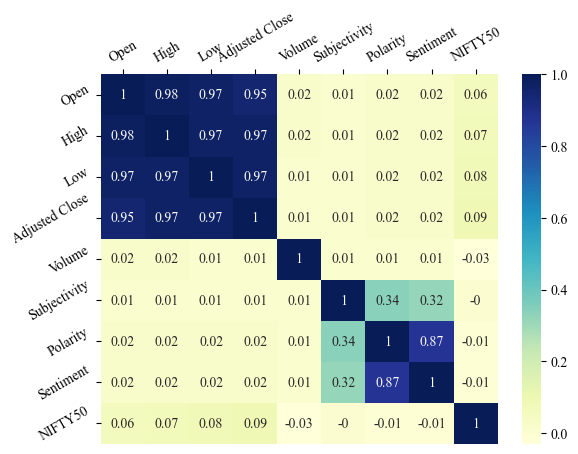

In [3]:
correlation_matrix = df[['Open', 'High', 'Low', 'Adjusted Close', 'Volume', 'Subjectivity',
       'Polarity', 'Sentiment', 'NIFTY50']].corr(method = 'kendall').round(2)
fig, ax = plt.subplots()
ax = sns.heatmap(correlation_matrix, annot=True, fmt='g', cmap="YlGnBu")
ax.xaxis.set_ticks_position('top')
ax.tick_params(axis='x', labelrotation=30)
ax.tick_params(axis='y', labelrotation=30)
fig.savefig('1b kendall_corr_mat', bbox_inches='tight', dpi = 300)

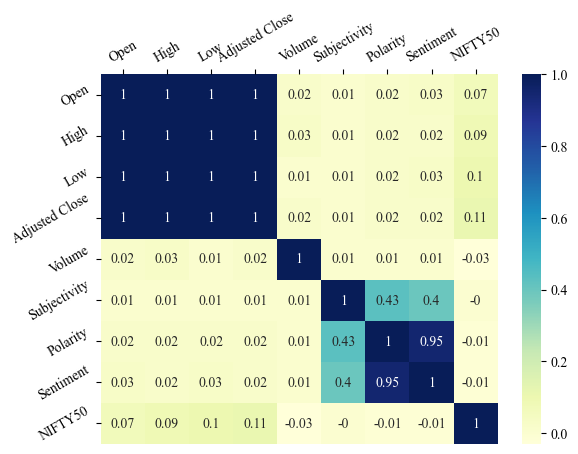

In [4]:
correlation_matrix = df[['Open', 'High', 'Low', 'Adjusted Close', 'Volume', 'Subjectivity',
       'Polarity', 'Sentiment', 'NIFTY50']].corr(method = 'spearman').round(2)
fig, ax = plt.subplots()
ax = sns.heatmap(correlation_matrix, annot=True, fmt='g', cmap="YlGnBu")
ax.xaxis.set_ticks_position('top')
ax.tick_params(axis='x', labelrotation=30)
ax.tick_params(axis='y', labelrotation=30)
fig.savefig('1c spearman_corr_mat', bbox_inches='tight', dpi = 300)

In [5]:
avg = np.mean(df[['Open', 'High', 'Low' , 'Adjusted Close']], axis=1).astype(int)
df = df.drop(columns = ['Date', 'Open' , 'High' , 'Low' , 'Adjusted Close', 'Polarity'], axis=1)
df.insert(0, 'New_feature', pd.Series(avg))

In [6]:
df.describe().astype(int)

,New_feature,Volume,Subjectivity,Sentiment,NIFTY50
count,20867,20867,20867,20867,20867
mean,12272,454187,0,0,0
std,2309,233090,0,0,0
min,7799,0,0,-1,0
25%,10771,278400,0,0,0
50%,11496,419700,0,0,1
75%,13383,606400,0,1,1
max,18500,1811000,1,1,1


In [7]:
columns_to_check=['New_feature', 'Volume', 'Subjectivity', 'Sentiment']
z_scores=stats.zscore(np.array(df[columns_to_check]))

In [8]:
z_score_threshold = 3
mask = (np.abs(z_scores) < z_score_threshold).all(axis=1)
df_no_outliers = df[mask]
print('Data after null removal: ', df_no_outliers.shape)
print(df_no_outliers.columns)

# fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,7))           #or figsize=(12,8)
# for i, column in enumerate(columns_to_check):
#     plt.subplot(2, 2, i+1)
#     sns.histplot(df[column], kde=True)
#     sns.histplot(df_no_outliers[column], kde=True)
#     plt.ylabel('Count', fontsize = 12, weight='bold')
#     plt.xlabel(f'{column}', fontsize = 12, weight='bold')
#     plt.legend(['Before', 'After'], loc='best', fontsize = 10)      #before and after outliers removal
# fig.savefig('2 outliers histplot', bbox_inches='tight', dpi = 300)

# # df[['ZS_New_feature','ZS_Volume', 'ZS_Subjectivity', 'ZS_Sentiment']] = z_scores
# # df

Data after null removal:  (20589, 5)
Index(['New_feature', 'Volume', 'Subjectivity', 'Sentiment', 'NIFTY50'], dtype='object')


In [9]:
df_no_outliers.describe().astype(int)

,New_feature,Volume,Subjectivity,Sentiment,NIFTY50
count,20589,20589,20589,20589,20589
mean,12290,441600,0,0,0
std,2316,206813,0,0,0
min,7799,0,0,-1,0
25%,10771,277600,0,0,0
50%,11502,414200,0,0,1
75%,13496,600400,0,1,1
max,18500,1103600,1,1,1


In [10]:
# fig = sns.pairplot(df_no_outliers, hue='NIFTY50', markers=["s", "D"], palette= "pastel").figure.savefig("3 pairplot.jpeg", bbox_inches='tight', dpi = 300)

In [11]:
import random
import joblib
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score, auc, roc_auc_score
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.metrics import roc_curve, precision_recall_curve, PrecisionRecallDisplay
from sklearn.cluster import KMeans

X, y = df_no_outliers[['New_feature', 'Volume', 'Subjectivity', 'Sentiment']], df_no_outliers['NIFTY50']
X_train, X_test, y_train, y_test = train_test_split(X , y , test_size = 0.30, random_state = 42)

sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)
X_sc = sc.transform(X)
print(X_train_sc[0])

[ 2.55018765 -0.36276278 -1.0514085  -0.44233663]


In [14]:
# LogisticRegression
model = LogisticRegression(C=0.1 , random_state=5)
model.fit(X_train_sc, y_train)
joblib.dump(model, 'LR.csv')

['LR.csv']

In [15]:
model = joblib.load('LR.csv')
# Prediction
y_pred = model.predict(X_test_sc)

score = accuracy_score(y_test, y_pred)
print("Accuracy (During Training): %.2f%%" % (score * 100))

Accuracy (During Training): 57.20%


In [14]:
y_pred_train = model.predict(X_train_sc)
train_data_result = {'NIFTY50_train_pred': y_pred_train.ravel()}
df_1 = pd.concat([pd.DataFrame(X_train), pd.DataFrame(y_train), pd.DataFrame(train_data_result)], axis=1)
df_1.to_csv('4a Train_data_with_Result.csv')
y_pred_test = model.predict(X_test_sc)
test_data_result = {'NIFTY50_test_pred': y_pred_test.ravel()}
df_2 = pd.concat([pd.DataFrame(X_test), pd.DataFrame(y_test), pd.DataFrame(test_data_result)], axis=1)
df_2.to_csv('4b Test_data_with_Result.csv')
y_pred = model.predict(X_sc)
total_data_result = {'NIFTY50_pred': y_pred.ravel()}
df_3 = pd.concat([pd.DataFrame(X), pd.DataFrame(y), pd.DataFrame(total_data_result)], axis=1)
df_3.to_csv('4c Total_data_with_Result.csv')

In [15]:
train_accuracy = accuracy_score(y_train, y_pred_train)
train_precision = precision_score(y_train, y_pred_train)
train_recall = recall_score(y_train, y_pred_train)
train_f1 = f1_score(y_train, y_pred_train)
train_roc_auc = roc_auc_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)
test_precision = precision_score(y_test, y_pred_test)
test_recall = recall_score(y_test, y_pred_test)
test_f1 = f1_score(y_test, y_pred_test)
test_roc_auc = roc_auc_score(y_test, y_pred_test)

In [16]:
print("\nTrain Accuracy: {:.4f} %".format(train_accuracy*100), 
      "\tTest Accuracy: {:.4f} %".format(test_accuracy*100))
print("\nTrain Precision: {:.4f} %".format(train_precision*100),
      "\tTest Precision: {:.4f} %".format(test_precision*100))
print("\nTrain Recall: {:.4f} %".format(train_recall*100),
      "\t\tTest Recall: {:.4f} %".format(test_recall*100))
print("\nTrain F1-Score: {:.4f}".format(train_f1),
      "\t\tTest F1-Score: {:.4f}".format(test_f1))
print("\nTrain ROC-AUC: {:.4f}".format(train_roc_auc),
      "\t\tTest ROC-AUC: {:.4f}".format(test_roc_auc), "\n")


Train Accuracy: 55.8077 % 	Test Accuracy: 57.1960 %

Train Precision: 55.8115 % 	Test Precision: 57.2053 %

Train Recall: 99.9876 % 		Test Recall: 99.9717 %

Train F1-Score: 0.7164 		Test F1-Score: 0.7277

Train ROC-AUC: 0.4999 		Test ROC-AUC: 0.4999 



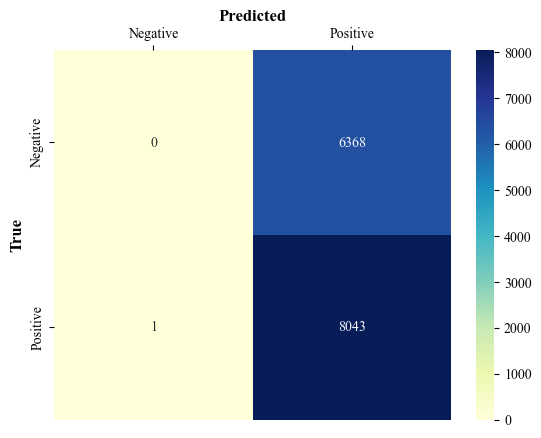

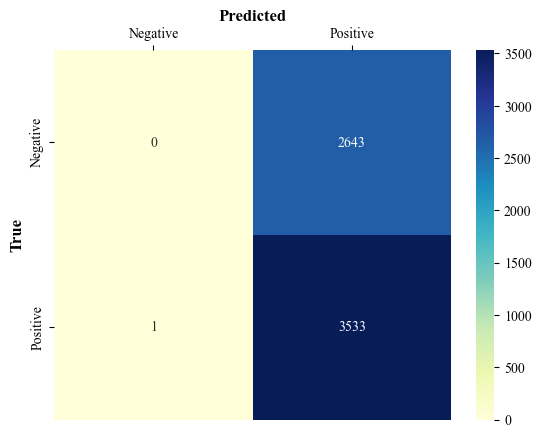

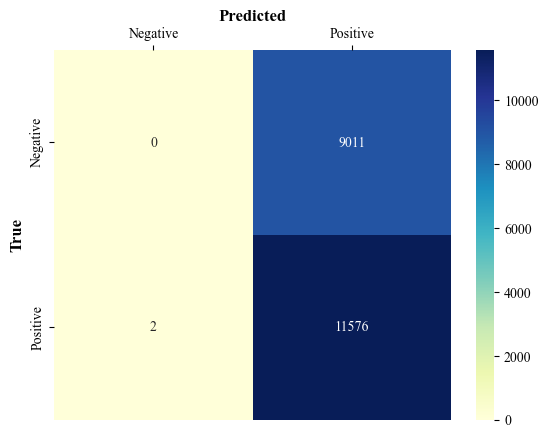

In [17]:
matrix1 = pd.DataFrame(confusion_matrix(y_train, y_pred_train), 
                       index=['Negative','Positive'], columns=['Negative','Positive'])
np.savetxt("5a conf_mat_train.csv", matrix1, delimiter=",")
matrix2 = pd.DataFrame(confusion_matrix(y_test, y_pred_test), 
                       index=['Negative','Positive'], columns=['Negative','Positive'])
np.savetxt("5b conf_mat_test.csv", matrix2, delimiter=",")
matrix3 = pd.DataFrame(confusion_matrix(y, y_pred), 
                       index=['Negative','Positive'], columns=['Negative','Positive'])
np.savetxt("5c conf_mat_total.csv", matrix3, delimiter=",")

# Plot the confusion matrix
fig = plt.figure()
ax = plt.subplot()
ax = sns.heatmap(matrix1, annot=True, fmt='g', cmap="YlGnBu")
ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')
ax.set_xlabel("Predicted", fontsize = 12, weight='bold')
ax.set_ylabel("True", fontsize = 12, weight='bold')
fig.savefig('5a conf_mat_train', bbox_inches='tight', dpi = 300)
fig = plt.figure()
ax = plt.subplot()
ax = sns.heatmap(matrix2, annot=True, fmt='g', cmap="YlGnBu")
ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')
ax.set_xlabel("Predicted", fontsize = 12, weight='bold')
ax.set_ylabel("True", fontsize = 12, weight='bold')
fig.savefig('5b conf_mat_test', bbox_inches='tight', dpi = 300)
fig = plt.figure()
ax = plt.subplot()
ax = sns.heatmap(matrix3, annot=True, fmt='g', cmap="YlGnBu")
ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')
ax.set_xlabel("Predicted", fontsize = 12, weight='bold')
ax.set_ylabel("True", fontsize = 12, weight='bold')
fig.savefig('5c conf_mat_total', bbox_inches='tight', dpi = 300)

In [18]:
# from sklearn.model_selection import train_test_split
# from sklearn.svm import SVC
# from sklearn.metrics import accuracy_score
# import numpy as np
# import random

# kernel_options = ['linear', 'poly', 'rbf', 'sigmoid']

# # Define the objective function
# def objf(X , kernal_options):

#     C_min, C_max = 0.1, 100.0
#     gamma_min, gamma_max = 0.01, 10.0

#     kernel_idx = int(X[0] * len(kernel_options))
#     if kernel_idx >= len(kernel_options):
#         kernel_idx = len(kernel_options) - 1
#     kernel = kernel_options[kernel_idx]

#     C = X[1] * (C_max - C_min) + C_min
#     gamma = X[2] * (gamma_max - gamma_min) + gamma_min

#     # Train SVM model
#     clf = SVC(kernel=kernel, C=C, gamma=gamma)
#     clf.fit(X_train_sc, y_train)

#     # Predict and compute accuracy
#     y_pred = clf.predict(X_test_sc)
#     return -accuracy_score(y_test, y_pred)  # Negative for minimization

In [19]:
import numpy as np
import random
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Define GWO function
def GWO(objf, lb, ub, dim, SearchAgents_no, Max_iter):
    # Initialize alpha, beta, and delta positions and scores
    Alpha_pos = np.zeros(dim)
    Alpha_score = float("inf")
    
    Beta_pos = np.zeros(dim)
    Beta_score = float("inf")
    
    Delta_pos = np.zeros(dim)
    Delta_score = float("inf")

    # Initialize positions of search agents
    Positions = np.random.uniform(0, 1, (SearchAgents_no, dim)) * (np.array(ub) - np.array(lb)) + np.array(lb)
    
    Convergence_curve = np.zeros(Max_iter)

    print("GWO is optimizing \"" + objf.__name__ + "\"")    

    # Main loop
    for l in range(Max_iter):
        for i in range(SearchAgents_no):
            # Return the search agents that go beyond the boundaries of the search space
            for j in range(dim):
                Positions[i, j] = round(np.clip(Positions[i, j], lb[j], ub[j]), 2)
            print(Positions)
            # Calculate objective function for each search agent
            fitness = objf(Positions[i, :])
            print(fitness)
            # Update Alpha, Beta, and Delta
            if fitness < Alpha_score:
                Alpha_score = fitness
                Alpha_pos = Positions[i, :].copy()
            
            if fitness > Alpha_score and fitness < Beta_score:
                Beta_score = fitness
                Beta_pos = Positions[i, :].copy()
            
            if fitness > Alpha_score and fitness > Beta_score and fitness < Delta_score: 
                Delta_score = fitness
                Delta_pos = Positions[i, :].copy()
        
        a = 2 - l * ((2) / Max_iter)

        # Update the position of search agents including omegas
        for i in range(SearchAgents_no):
            for j in range(dim):     
                r1 = random.random()
                r2 = random.random()
               
                A1 = 2 * a * r1 - a
                C1 = 2 * r2
                
                D_alpha = abs(C1 * Alpha_pos[j] - Positions[i, j])
                X1 = Alpha_pos[j] - A1 * D_alpha
                           
                r1 = random.random()
                r2 = random.random()
                
                A2 = 2 * a * r1 - a
                C2 = 2 * r2
                
                D_beta = abs(C2 * Beta_pos[j] - Positions[i, j])
                X2 = Beta_pos[j] - A2 * D_beta       
                
                r1 = random.random()
                r2 = random.random() 
                
                A3 = 2 * a * r1 - a
                C3 = 2 * r2
                
                D_delta = abs(C3 * Delta_pos[j] - Positions[i, j])
                X3 = Delta_pos[j] - A3 * D_delta    

                # Round positions to two decimal places
                X1 = round(X1, 2)
                X2 = round(X2, 2)
                X3 = round(X3, 2)
                
                print(X1 , X2 , X3 )
                Positions[i, j] = (X1 + X2 + X3) / 3
        
        Convergence_curve[l] = Alpha_score
    
    print("Alpha position =", Alpha_pos)
    print("Beta position =", Beta_pos)
    print("Delta position =", Delta_pos)

    return Alpha_pos, Alpha_score


In [20]:
# Define the objective function
def objf(X):
    # Define the range for hyperparameters
    C_min, C_max = 0.1, 1000.0
    solvers = ['newton-cg' , 'lbfgs' , 'liblinear']
    
    # Scale the value of C between C_min and C_max
    C = min(max(X[0], 0), 1) * (C_max - C_min) + C_min
    solver = solvers[int(round(X[1]))]
    
    # Initialize LR model with hyperparameter C
    model = LogisticRegression(C=C , penalty='l2' , solver=solver)
    
    # Train LR model
    model.fit(X_train_sc, y_train)
    
    # Predict using LR model
    y_pred = model.predict(X_test_sc)
    
    # Compute accuracy score
    accuracy = accuracy_score(y_test, y_pred)
    
    # Return negative accuracy score for minimization
    return accuracy

# Example usage
lb = [-2 , -2]  # Lower bounds for C
ub = [2 , 2 ]  # Upper bounds for C
dim = 2  # Dimensionality of the search space
num_wolves = 5  # Number of search agents (wolves)
num_iterations = 100  # Number of iterations

best_params, best_score = GWO(objf, lb, ub, dim, num_wolves, num_iterations)
print("Best parameters:", best_params)
print("Best score:", best_score)

GWO is optimizing "objf"
[[ 1.54        1.27      ]
 [ 1.06858471  0.60582747]
 [ 1.13675439 -0.67593121]
 [ 0.69741499 -0.18268399]
 [-0.06799578  0.05032643]]
0.5717986077383843
[[ 1.54        1.27      ]
 [ 1.07        0.61      ]
 [ 1.13675439 -0.67593121]
 [ 0.69741499 -0.18268399]
 [-0.06799578  0.05032643]]
0.5717986077383843
[[ 1.54        1.27      ]
 [ 1.07        0.61      ]
 [ 1.14       -0.68      ]
 [ 0.69741499 -0.18268399]
 [-0.06799578  0.05032643]]
0.5717986077383843
[[ 1.54        1.27      ]
 [ 1.07        0.61      ]
 [ 1.14       -0.68      ]
 [ 0.7        -0.18      ]
 [-0.06799578  0.05032643]]
0.5717986077383843
[[ 1.54  1.27]
 [ 1.07  0.61]
 [ 1.14 -0.68]
 [ 0.7  -0.18]
 [-0.07  0.05]]
0.5717986077383843
3.37 1.23 -0.09
0.65 -0.85 -0.92
0.9 0.34 1.21
-0.59 0.84 1.0
1.34 1.5 -2.19
-0.61 -1.19 0.37
1.7 -0.56 -1.38
1.32 0.28 0.09
3.76 0.07 0.02
0.82 -0.01 -0.04
[[ 1.5        -0.37      ]
 [ 0.81666667  0.41666667]
 [ 0.21666667 -0.47666667]
 [-0.08        0.56333

In [21]:
C_min, C_max = 0.1, 10000.0
solvers = ['newton-cg' , 'lbfgs' , 'liblinear']
    
    # Scale the value of C between C_min and C_max
C = min(max(best_params[0], 0), 1) * (C_max - C_min) + C_min
solver = solvers[int(round(best_params[1]))]
    
    # Initialize LR model with hyperparameter C
model = LogisticRegression(C=C , penalty='l2' , solver=solver)
    
    # Train LR model
model.fit(X_train_sc, y_train)
joblib.dump(model, 'LR_GWO.csv')
    # Predict using LR model
model = joblib.load('LR_GWO.csv')
y_pred = model.predict(X_test_sc)

In [22]:
y_pred_train = model.predict(X_train_sc)
train_data_result = {'NIFTY50_train_pred': y_pred_train.ravel()}
df_1 = pd.concat([pd.DataFrame(X_train), pd.DataFrame(y_train), pd.DataFrame(train_data_result)], axis=1)
df_1.to_csv('4a Train_data_with_Result.csv')
y_pred_test = model.predict(X_test_sc)
test_data_result = {'NIFTY50_test_pred': y_pred_test.ravel()}
df_2 = pd.concat([pd.DataFrame(X_test), pd.DataFrame(y_test), pd.DataFrame(test_data_result)], axis=1)
df_2.to_csv('4b Test_data_with_Result.csv')
y_pred = model.predict(X_sc)
total_data_result = {'NIFTY50_pred': y_pred.ravel()}
df_3 = pd.concat([pd.DataFrame(X), pd.DataFrame(y), pd.DataFrame(total_data_result)], axis=1)
df_3.to_csv('4c Total_data_with_Result.csv')

In [23]:
train_accuracy = accuracy_score(y_train, y_pred_train)
train_precision = precision_score(y_train, y_pred_train)
train_recall = recall_score(y_train, y_pred_train)
train_f1 = f1_score(y_train, y_pred_train)
train_roc_auc = roc_auc_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)
test_precision = precision_score(y_test, y_pred_test)
test_recall = recall_score(y_test, y_pred_test)
test_f1 = f1_score(y_test, y_pred_test)
test_roc_auc = roc_auc_score(y_test, y_pred_test)

In [24]:
print("\nTrain Accuracy: {:.4f} %".format(train_accuracy*100), 
      "\tTest Accuracy: {:.4f} %".format(test_accuracy*100))
print("\nTrain Precision: {:.4f} %".format(train_precision*100),
      "\tTest Precision: {:.4f} %".format(test_precision*100))
print("\nTrain Recall: {:.4f} %".format(train_recall*100),
      "\t\tTest Recall: {:.4f} %".format(test_recall*100))
print("\nTrain F1-Score: {:.4f}".format(train_f1),
      "\t\tTest F1-Score: {:.4f}".format(test_f1))
print("\nTrain ROC-AUC: {:.4f}".format(train_roc_auc),
      "\t\tTest ROC-AUC: {:.4f}".format(test_roc_auc), "\n")


Train Accuracy: 55.8077 % 	Test Accuracy: 57.1799 %

Train Precision: 55.8115 % 	Test Precision: 57.1984 %

Train Recall: 99.9876 % 		Test Recall: 99.9434 %

Train F1-Score: 0.7164 		Test F1-Score: 0.7276

Train ROC-AUC: 0.4999 		Test ROC-AUC: 0.4997 



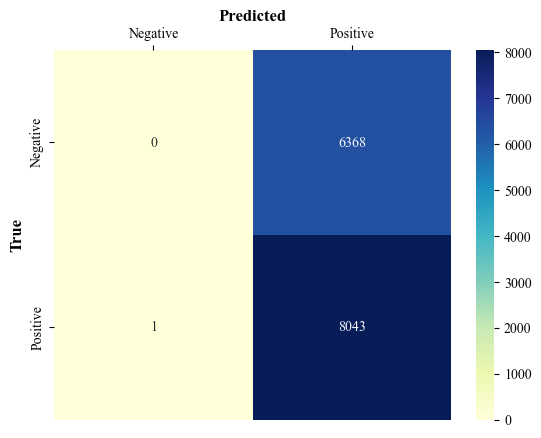

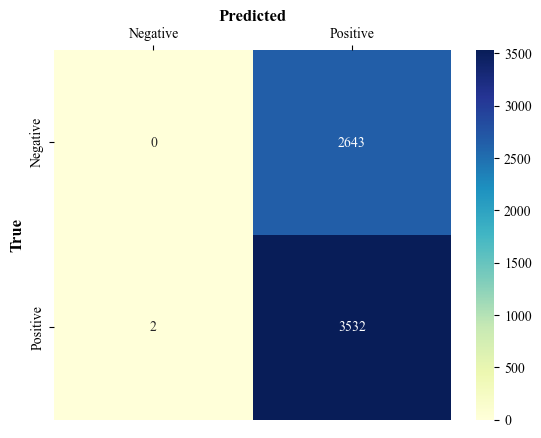

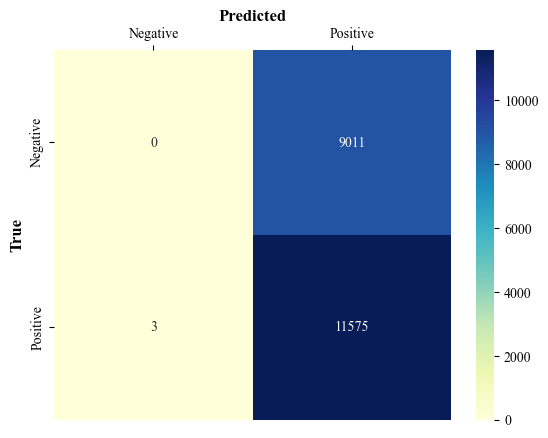

In [25]:
matrix1 = pd.DataFrame(confusion_matrix(y_train, y_pred_train), 
                       index=['Negative','Positive'], columns=['Negative','Positive'])
np.savetxt("6a conf_mat_train.csv", matrix1, delimiter=",")
matrix2 = pd.DataFrame(confusion_matrix(y_test, y_pred_test), 
                       index=['Negative','Positive'], columns=['Negative','Positive'])
np.savetxt("6b conf_mat_test.csv", matrix2, delimiter=",")
matrix3 = pd.DataFrame(confusion_matrix(y, y_pred), 
                       index=['Negative','Positive'], columns=['Negative','Positive'])
np.savetxt("6c conf_mat_total.csv", matrix3, delimiter=",")

# Plot the confusion matrix
fig = plt.figure()
ax = plt.subplot()
ax = sns.heatmap(matrix1, annot=True, fmt='g', cmap="YlGnBu")
ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')
ax.set_xlabel("Predicted", fontsize = 12, weight='bold')
ax.set_ylabel("True", fontsize = 12, weight='bold')
fig.savefig('6a conf_mat_train', bbox_inches='tight', dpi = 300)
fig = plt.figure()
ax = plt.subplot()
ax = sns.heatmap(matrix2, annot=True, fmt='g', cmap="YlGnBu")
ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')
ax.set_xlabel("Predicted", fontsize = 12, weight='bold')
ax.set_ylabel("True", fontsize = 12, weight='bold')
fig.savefig('6b conf_mat_test', bbox_inches='tight', dpi = 300)
fig = plt.figure()
ax = plt.subplot()
ax = sns.heatmap(matrix3, annot=True, fmt='g', cmap="YlGnBu")
ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')
ax.set_xlabel("Predicted", fontsize = 12, weight='bold')
ax.set_ylabel("True", fontsize = 12, weight='bold')
fig.savefig('6c conf_mat_total', bbox_inches='tight', dpi = 300)